In [13]:
import pymc3 as pm
pm.__version__

'3.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

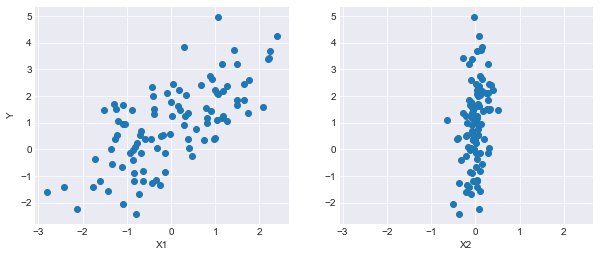

In [3]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [4]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [5]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21


{'alpha': array(0.9065985664354854),
 'beta': array([ 0.948486  ,  2.60705513]),
 'sigma_log__': array(-0.032781468548420914)}

In [6]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 156:   6%|▌         | 11027/200000 [00:06<01:47, 1754.55it/s]   
Convergence archived at 11100
Interrupted at 11,100 [5%]: Average Loss = 237.04
100%|██████████| 1000/1000 [00:01<00:00, 749.97it/s]


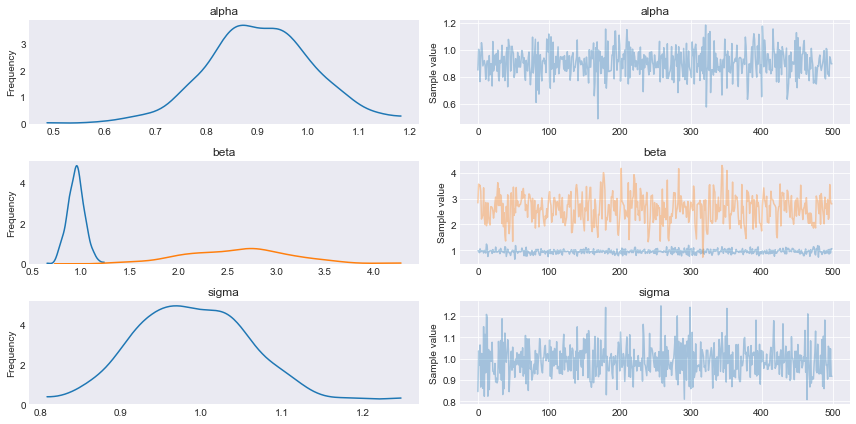

In [7]:
pm.traceplot(trace);

In [8]:
import pandas as pd
import pyfolio as pf

In [9]:
results = pd.read_pickle('../alphatools/misc/outfile.pickle')

In [10]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/pyfolio/tears.py:514: UserWarning: The latest version of pyfolio requires users to supply benchmark returns. Your current tearsheets will not include plots and analyses that require a benchmark. In the future, please pass benchmark_rets, or pass None to silence this warning.
  warnings.warn(BENCHMARK_RETS_WARNING)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,85.87,2016-07-26,2017-11-22,NaT,NaN
1,35.62,2016-04-18,2016-04-22,2016-04-29,10
2,14.99,2016-05-06,2016-07-19,2016-07-20,54
3,13.19,2016-05-02,2016-05-03,2016-05-06,5
4,0.00,2016-01-04,2016-01-04,2016-01-04,1


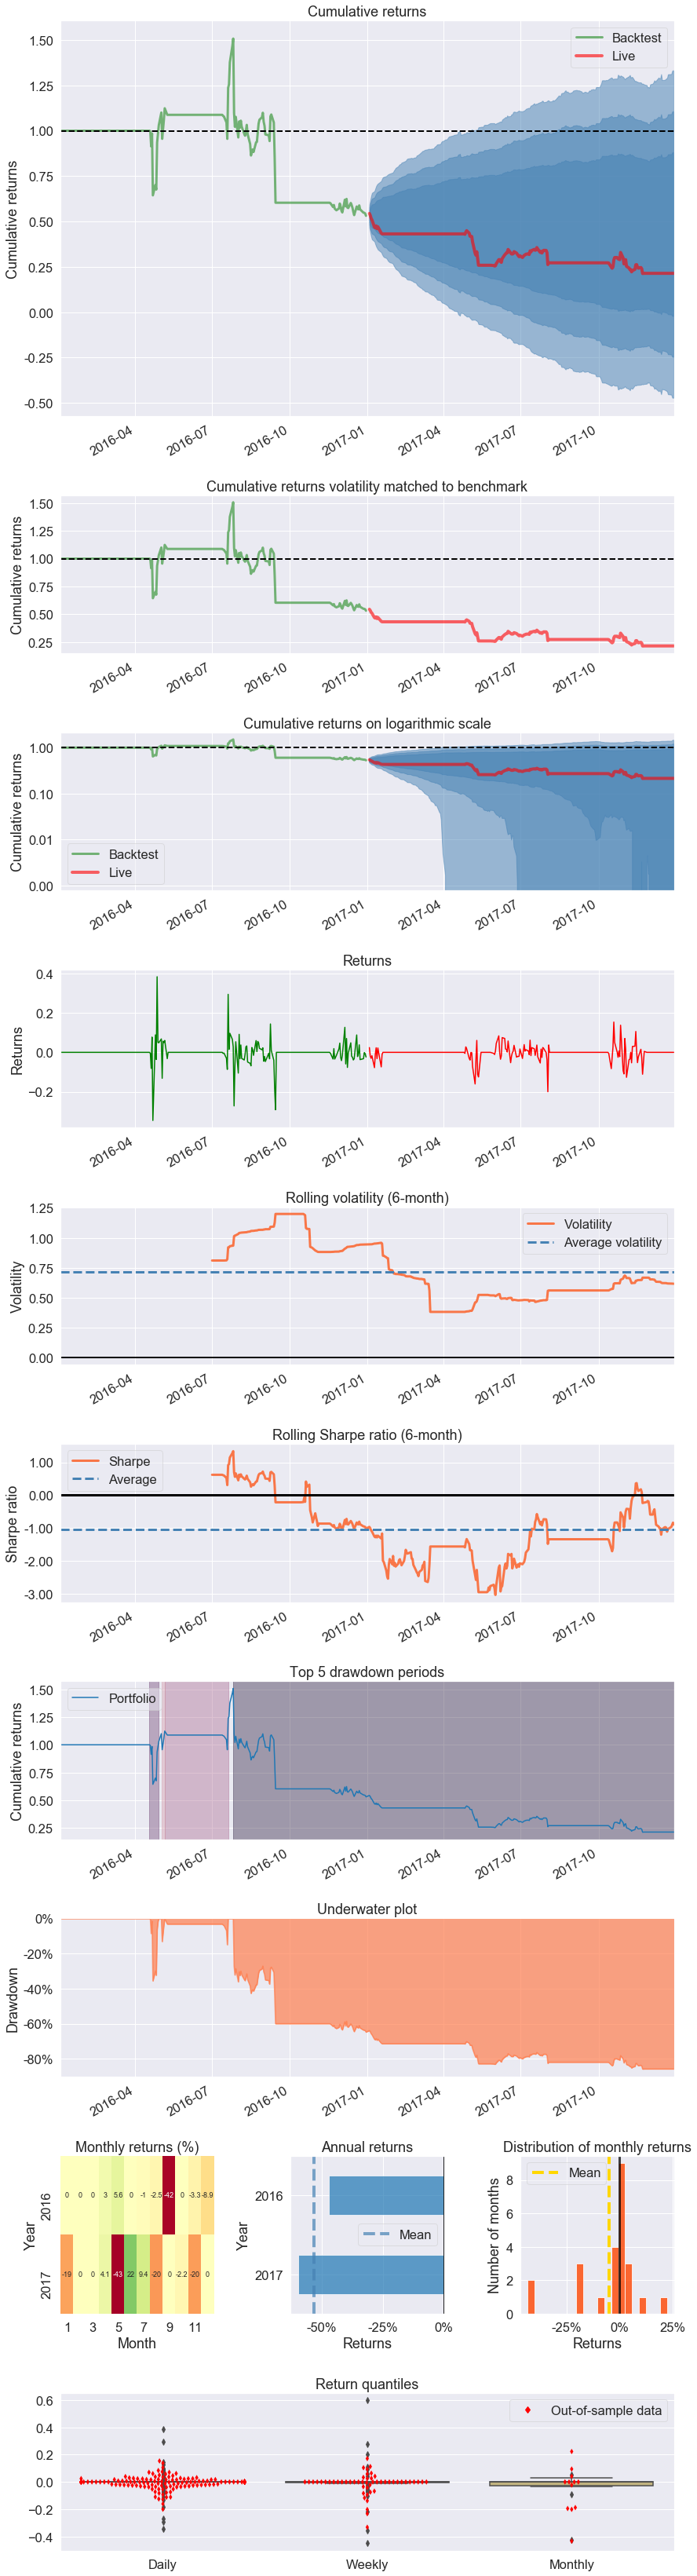

In [11]:
pf.create_returns_tear_sheet(returns,live_start_date='2017-01-01')

/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/pyfolio/tears.py:1165: UserWarning: The latest version of pyfolio requires users to supply benchmark returns. Your current tearsheets will not include plots and analyses that require a benchmark. In the future, please pass benchmark_rets, or pass None to silence this warning.
  warnings.warn(BENCHMARK_RETS_WARNING)


Running T model


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -959.85:  21%|██▏       | 42899/200000 [00:23<01:17, 2039.83it/s]
Convergence archived at 43100
Interrupted at 43,100 [21%]: Average Loss = -348.43
100%|██████████| 2000/2000 [00:01<00:00, 1180.14it/s]



Finished T model (required 72.09 seconds).

Running BEST model


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -1,236.2:  21%|██        | 41801/200000 [00:24<01:28, 1791.55it/s]
Convergence archived at 42000
Interrupted at 42,000 [21%]: Average Loss = -625.1
100%|██████████| 2500/2500 [00:05<00:00, 492.10it/s]



Finished BEST model (required 65.69 seconds).

Finished plotting Bayesian cone (required 0.10 seconds).


/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
No handles with labels found to put in legend.



Finished plotting BEST results (required 0.37 seconds).

Finished computing Bayesian predictions (required 0.05 seconds).

Finished plotting Bayesian VaRs estimate (required 0.03 seconds).

Total runtime was 138.33 seconds.


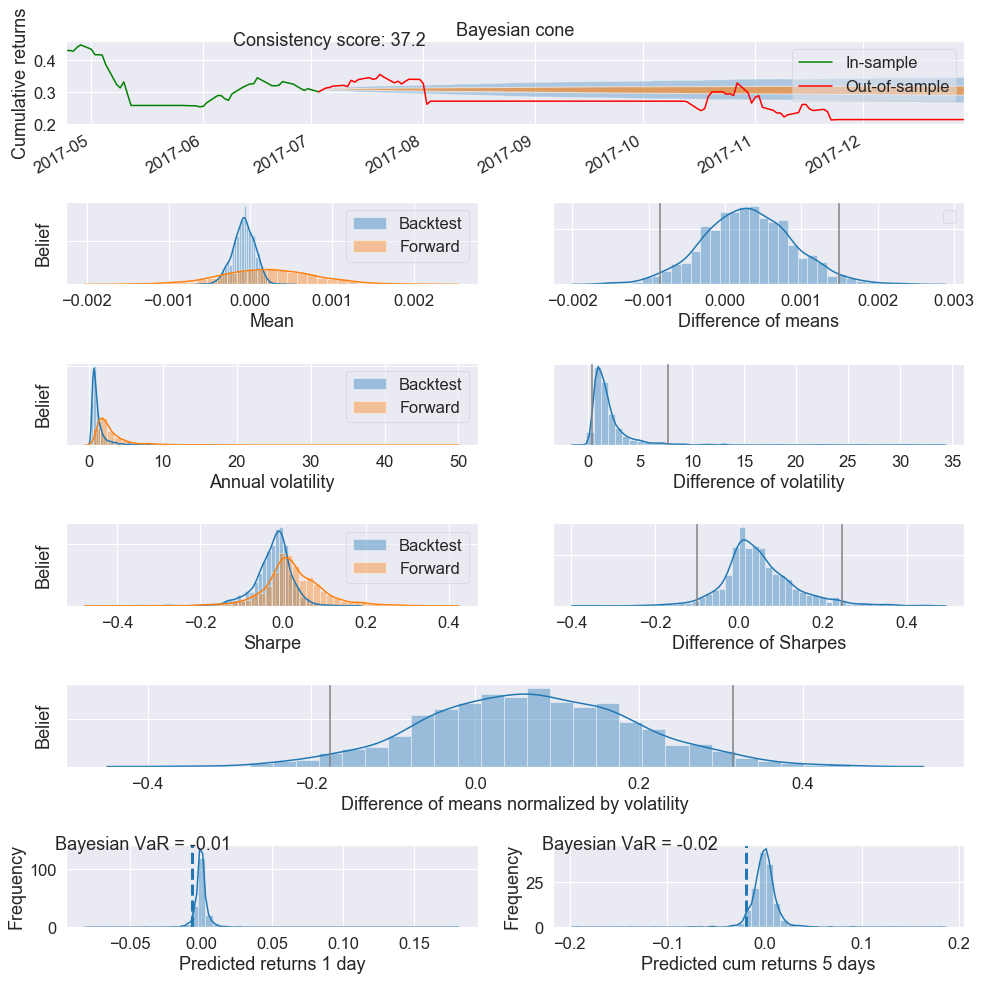

In [12]:
pf.create_bayesian_tear_sheet(returns, live_start_date='2017-07-01')